# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
demo01 = pd.read_csv('demo01.csv')
demo01.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
demo01.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
demo01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [5]:
demo01['mau'].value_counts(normalize = True)

False    0.976577
True     0.023423
Name: mau, dtype: float64

In [6]:
demo01 = demo01.drop_duplicates()

In [7]:
demo01.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [8]:
demo01 = demo01.dropna(axis=0)

In [9]:
demo01.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [10]:
col_names = list(demo01.columns)
col_names

['sexo',
 'posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'tipo_renda',
 'educacao',
 'estado_civil',
 'tipo_residencia',
 'idade',
 'tempo_emprego',
 'possui_celular',
 'possui_fone_comercial',
 'possui_fone',
 'possui_email',
 'qt_pessoas_residencia',
 'mau']

In [11]:
col_types = [str(demo01[col].dtype) for col in col_names]
col_types


['object',
 'object',
 'object',
 'int64',
 'object',
 'object',
 'object',
 'object',
 'float64',
 'float64',
 'int64',
 'int64',
 'int64',
 'int64',
 'float64',
 'bool']

In [12]:
df_info = pd.DataFrame({'nome': col_names, 'tipo': col_types})

In [13]:
df_info

,nome,tipo
0,sexo,object
1,posse_de_veiculo,object
2,posse_de_imovel,object
3,qtd_filhos,int64
4,tipo_renda,object
5,educacao,object
6,estado_civil,object
7,tipo_residencia,object
8,idade,float64
9,tempo_emprego,float64


In [14]:
qtd_categorias = []
for col in col_names:
    if demo01[col].dtype == 'object':
        qtd_categorias.append(len(demo01[col].unique()))
    else:
        qtd_categorias.append('-')
df_info['qtd_categorias'] = qtd_categorias
qtd_categorias

[2, 2, 2, '-', 5, 5, 5, 6, '-', '-', '-', '-', '-', '-', '-', '-']

In [15]:
df_info

,nome,tipo,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,-
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,-
9,tempo_emprego,float64,-


In [16]:
demo01

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
6,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [26]:
demo01 = pd.get_dummies(demo01, columns=['sexo','posse_de_veiculo','posse_de_imovel','qtd_filhos','tipo_renda','educacao','estado_civil','tipo_residencia'	], drop_first=True)


In [27]:
demo01

,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,58.832877,3.106849,1,0,0,0,2.0,False,1,1,...,1,1,0,0,0,1,0,0,0,0
1,52.356164,8.358904,1,0,1,1,1.0,False,0,0,...,1,0,0,1,0,1,0,0,0,0
3,46.224658,2.106849,1,1,1,1,2.0,False,1,1,...,0,1,0,0,0,1,0,0,0,0
4,29.230137,3.021918,1,0,0,0,2.0,False,0,1,...,0,1,0,0,0,1,0,0,0,0
6,27.482192,4.024658,1,0,1,0,2.0,False,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,34.857534,3.101370,1,1,1,0,1.0,True,0,0,...,1,0,0,1,0,1,0,0,0,0
16645,54.109589,9.884932,1,0,0,0,2.0,True,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,43.389041,7.380822,1,1,1,0,2.0,True,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,30.005479,9.800000,1,1,0,0,2.0,True,1,1,...,1,1,0,0,0,1,0,0,0,0


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [33]:
demo01

,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,58.832877,3.106849,1,0,0,0,2.0,False,1,1,...,1,1,0,0,0,1,0,0,0,0
1,52.356164,8.358904,1,0,1,1,1.0,False,0,0,...,1,0,0,1,0,1,0,0,0,0
3,46.224658,2.106849,1,1,1,1,2.0,False,1,1,...,0,1,0,0,0,1,0,0,0,0
4,29.230137,3.021918,1,0,0,0,2.0,False,0,1,...,0,1,0,0,0,1,0,0,0,0
6,27.482192,4.024658,1,0,1,0,2.0,False,0,0,...,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16644,34.857534,3.101370,1,1,1,0,1.0,True,0,0,...,1,0,0,1,0,1,0,0,0,0
16645,54.109589,9.884932,1,0,0,0,2.0,True,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,43.389041,7.380822,1,1,1,0,2.0,True,0,0,...,1,1,0,0,0,1,0,0,0,0
16647,30.005479,9.800000,1,1,0,0,2.0,True,1,1,...,1,1,0,0,0,1,0,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [34]:

pd.crosstab(demo01['possui_email'], demo01['posse_de_veiculo_Y'], margins=True)


posse_de_veiculo_Y,0,1,All
possui_email,,,
0,3878,2327,6205
1,333,232,565
All,4211,2559,6770


<IPython.core.display.Javascript object>


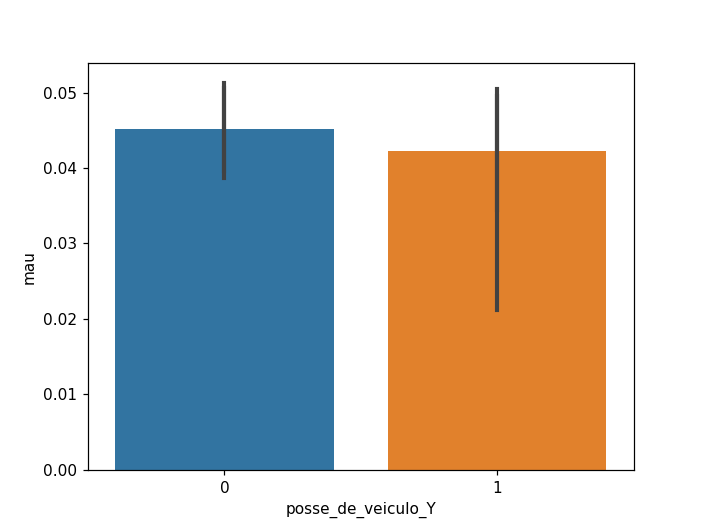

In [35]:
sns.barplot(x='possui_email', y='mau', data=demo01)
plt.show()

In [36]:
sns.barplot(x='posse_de_veiculo_Y', y='mau', data=demo01)
plt.show()


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [28]:
demo01.to_csv("demo01.csv", index=False)